
### Визуализация центральной предельной теоремы.

 Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. 

Попробуем убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируем 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [186]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

Сгенерируем 500 независимых наборов случайных величин:

In [219]:
size = 300
samples_count = 500
samples = sps.expon.rvs(size=(samples_count, size))

Для расчета $Z_{jn}$ будем использовать теоретические значения $\mathsf{E}X_{jn}$ и $\mathsf{D}X_{jn}$
Матожидание и дисперсия случайной величины, имеющей экспоненциальное распределение с параметром $\lambda$ равны, соответственно 
$E\xi_i = \lambda^{-1}$, $D\xi_i = \lambda^{-2}$

В нашем случае $\lambda = 1$:  $E\xi_i = D\xi_i = 1$

Матожидание суммы случайных величин равняется сумме матожиданий:

$\mathsf{E}X_{jn} = \mathsf{E}\sum\limits_{i=1}^n \xi_i^j = \sum\limits_{i=1}^n \mathsf{E}\xi_i^j = n \cdot \mathsf{E} \xi_i = n$

Для независимых случайных величин выполняется также:

$\mathsf{D}X_{jn} = \mathsf{D}\sum\limits_{i=1}^n \xi_i^j = \sum\limits_{i=1}^n \mathsf{D}\xi_i^j = n \cdot \mathsf{D} \xi_i = n$


In [220]:
#теоретические значения матожидания и дисперсии
E_exp = D_exp = np.arange(size) + 1


In [221]:
def calculation_z_values(samples, E, D):
    
    '''Функция получает на вход набор случайных величин,
        теоретические значения для матожидания и дисперсии
        для значений из набора вычисляет значения $Z_{jn}$         
    '''
    
    cum_sum = samples.cumsum(axis = 1)
    z_values = (cum_sum - E)/(D ** 0.5)
    return z_values

In [222]:
z_values = calculation_z_values(samples, E_exp, D_exp)

Для каждого $j$ нанесем на один график зависимость $Z_{jn}$ от $n$. Посмотрим, сходятся ли значения $Z_{jn}$ к какой-либо константе.

In [223]:
def plot_dependency(z_values, distribution_name):
    
    '''Функция строит график зависимости Z_{jn} от n 
       для данного распределения
       distribution_name - название распределения
        z_values - список значений Z_{jn}
    '''
    
    plt.figure(figsize = (15, 5))

    # Отрисовываем необходимые зависимости
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, z_values[i], alpha=0.05)

    # Подписываем график и оси

    plt.title("Зависимость величины $Z_{j,n}$ от количества "
    "случайных величин с распределением " + distribution_name)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение $Z_{j,n}$')
    plt.xlim((0, size));

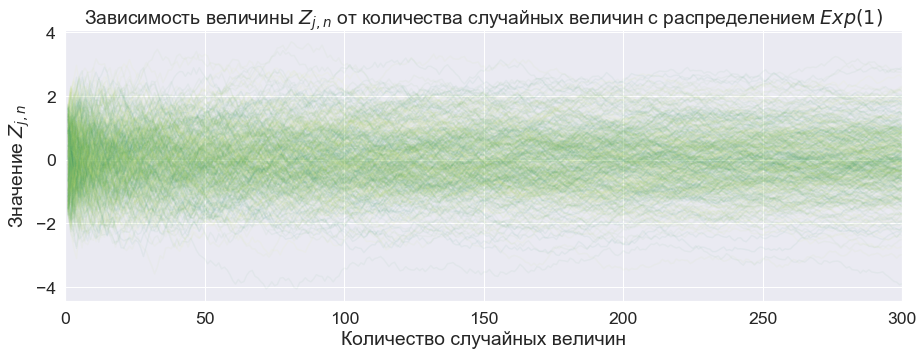

In [224]:
plot_dependency(z, '$Exp(1)$')

Значения $Z_{jn}$ к какой-либо константе не сходятся

Построим гистограмму для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$. 

На том же графике построим плотность распределения $\mathcal{N}(0, 1)$

In [225]:
def make_hist(z_values, distribution_name):
    
    ''' Функция строит на одном графике гистограмму 
        по значениям Z_{jn} и распределение N(0,1)
        distribution_name - название распределения
        z_values - список значений Z_{jn}
    '''
    
    # Гистограмма набора величин $Z_{j,300}$

    plt.figure(figsize = (14, 5))
    plt.hist(z_values[:, -1],
    bins = 15, # Если брать количество бинов равное log_2(500),
               #то получается  достаточно уныло, 
               #поэтому берем чуть больше ))
    density = True,
    label = 'Гистограмма выборки $Z_{j,300}$',
    )

    # Нормальное распределение

    x = np.linspace(z_values[:, -1].min(),
                    z_values[:, -1].max(),
                    num=1000)
    plt.plot(x,
    sps.norm.pdf(x, loc=0, scale=1),
    color = 'r',
    label = 'Плотность распределения $N(0,1)$'
    )

    # Подписываем график и оси

    plt.title("Распределение величины $Z_{j,300}$ для случайных"
              "величин с распределением " + distribution_name)
    plt.xlabel('Значение случайной величины')
    plt.ylabel('Плотность')

    # отрисовываем легенду
    plt.legend(loc = 'upper right', prop={'size': 13})

    # и сам график
    plt.show()

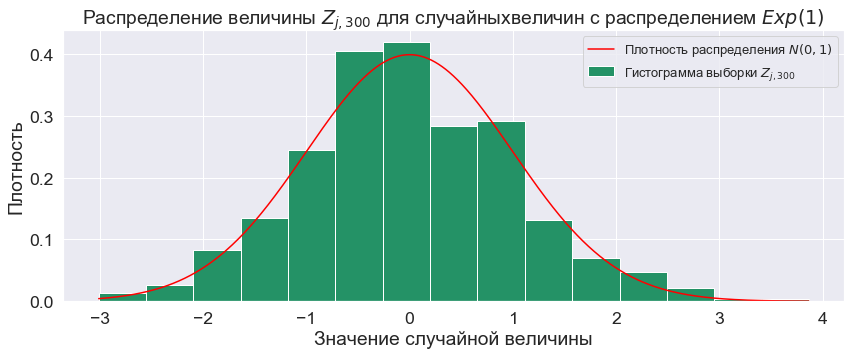

In [226]:
make_hist(z_values, '$Exp(1)$')

Видно, что гистограмма, построенная по значениям $Z_{j,300}$ очень похожа на нормальное распределение с параметрами (0, 1), что подтвержает центральную предельную теорему для экспоненциально распределенных случайных величин

#### Выполним те же действия для распределений $U(0, 1)$ и $Pois(1)$.

Для $U(0, 1)$

Сгенерируем 500 независимых наборов случайных величин:

In [227]:
samples = sps.uniform(0, 1).rvs(size=(samples_count, size))


In [228]:
#теоретические значения матожидания и дисперсии
E_unif = 0.5 * (np.arange(size) + 1)
D_unif = (1/12) *(np.arange(size) + 1)

In [229]:
z_values = calculation_z_values(samples, E_unif, D_unif)

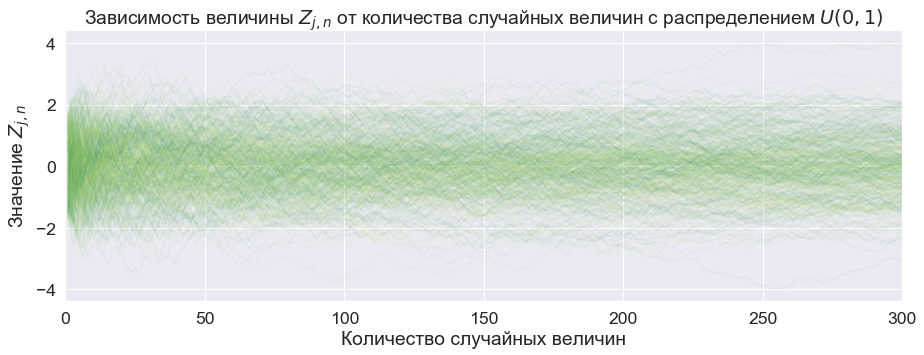

In [230]:
plot_dependency(z_values, '$U(0, 1)$')

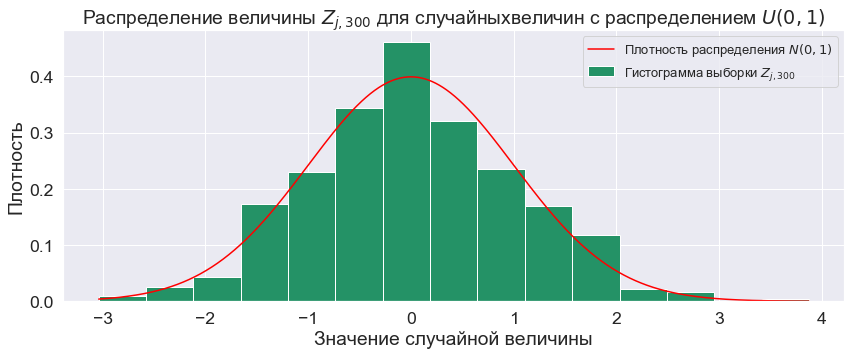

In [231]:
make_hist(z_values, '$U(0,1)$')

Для $Pois(1)$

In [232]:
samples = sps.poisson(1).rvs(size=(samples_count, size))

In [233]:
#теоретические значения матожидания и дисперсии
E_pois = D_pois = np.arange(size) + 1

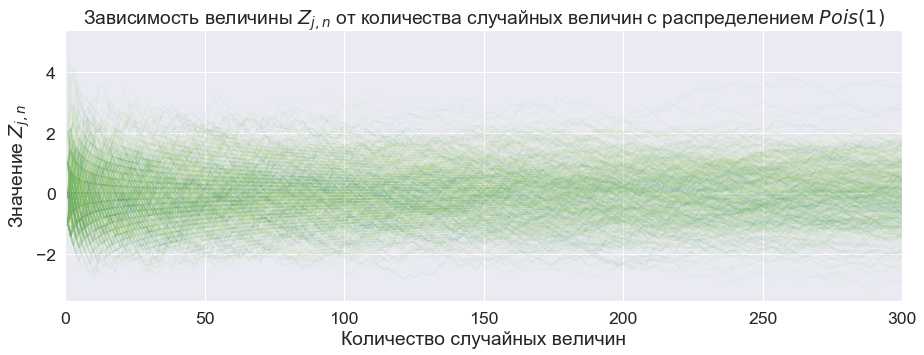

In [234]:
z_values = calculation_z_values(samples, E_pois, D_pois)
plot_dependency(z_values, '$Pois(1)$')

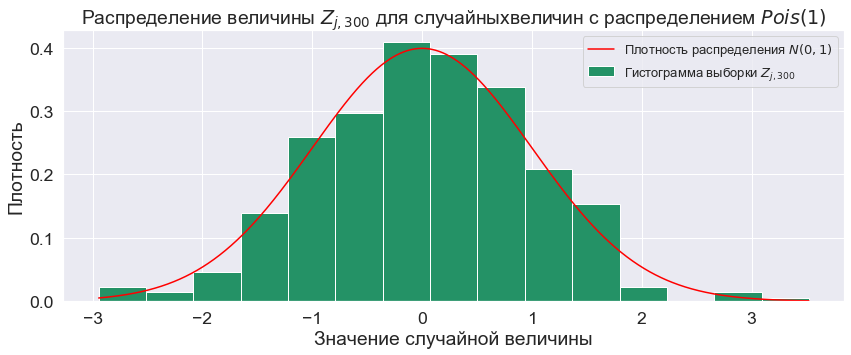

In [235]:
make_hist(z_values, '$Pois(1)$')

**Вывод:** По графикам зависимостей $Z_{jn}$ от $n$, видим, что значения $Z_{jn}$ не сходятся к какой-либо константе.
Вне завсимости от того,  из какого распределения мы генерируем наборы случайных величин, гистограмма, построенная по значениям $Z_{j,300}$ близка к нормальному распределению с параметрами (0, 1), что подтвержает центральную предельную теорему.
Значит, данный эксперимент хорошо визуализирует центральную предельную теорему.